In [ ]:
'''Objective: Build a model to predict the band gap of a material based on what element it is,
            its position in space, and its lattice information, using regression based machine learning'''


'''X3 works in this version'''

In [1]:
#Call data

from aflow import *

result = search(batch_size=20
        ).filter(K.Egap > 1
        ).filter(K.nspecies == 1)

#part = result[0:1000]

#len(part)
print(result[0].Egap)
#for entry in result[0:5]:
    #print(entry.Egap)

1.0032


In [24]:
#make data right type/shape

#make X1 from atomic name to atomic number
from mendeleev import element
import numpy as np

at_num = []

for i in result[0:6]:
    ele = (i.species[0])
    z= ele.replace('\n','')
    number= element(z).atomic_number
    #print(number)
    at_num.append(number)
    
#print(at_num)

x1= np.asarray(at_num).reshape(-1,1)
print(x1)

[[34]
 [ 9]
 [14]
 [14]
 [ 8]
 [ 8]]


In [27]:
#X2 array
pos=[]
for entry in result[0:6]:
    x2= entry.positions_fractional
    pos.append(x2)

#print(pos)

x2= np.asarray(pos).reshape(6,-1)

print(x2)

[[array([[ 0.21906427, -0.        ,  0.333333  ],
       [-0.        ,  0.21906427,  0.66666633],
       [ 0.78093573,  0.78093573, -0.        ]])]
 [array([[0.        , 0.7702899 , 0.33333333],
       [0.2297101 , 0.2297101 , 0.66666667],
       [0.7702899 , 0.        , 0.        ]])]
 [array([[ 0.29060846,  0.20939721,  0.68780964],
       [ 0.70939154,  0.79060279,  0.68780964],
       [ 0.08121125,  0.79060279,  0.31219036],
       [ 0.91878875,  0.20939721,  0.31219036],
       [ 0.70939154,  0.79060279,  0.31219036],
       [ 0.29060846,  0.20939721,  0.31219036],
       [ 0.91878875,  0.20939721,  0.68780964],
       [ 0.08121125,  0.79060279,  0.68780964],
       [ 0.11948009,  0.61948614,  0.81323099],
       [ 0.88051991,  0.38051386,  0.81323099],
       [ 0.49999395,  0.38051386,  0.18676901],
       [ 0.50000605,  0.61948614,  0.18676901],
       [ 0.88051991,  0.38051386,  0.18676901],
       [ 0.11948009,  0.61948614,  0.18676901],
       [ 0.50000605,  0.61948614,  0.81

In [50]:
#X3 array

geo=[]

for entry in result[0:6]:
    #x2= entry.positions_fractional
    #X2.append(x2)
    
    x3= entry. geometry
    #print(X3)
    geo.append(x3)
    
#print(geo)

#x3= np.array([result[0:6],6])
x3=np.asarray(geo).reshape(6,6)

print(x3)

[[  4.523779   4.523779   5.049212  90.        90.       120.      ]
 [  3.546542   3.546542   3.910963  90.        90.       120.      ]
 [ 10.21488   10.21495   10.38431   90.        90.       119.9998  ]
 [ 10.8115    10.8115    10.8115   109.4712   109.4712   109.4712  ]
 [  6.934511   7.59636    7.826332  89.9968    90.        90.      ]
 [  5.171968   5.171968   7.033757  90.        90.       136.9788  ]]


In [16]:
#Define X and Y

   #entry.species, entry.geometry, entry.positions_fractional
    

Y=[]


X1= x1  
X2=x2
X3=x3
print(X2)
    
#for entry in result[0:6]:
    #x2= entry.positions_fractional
    #X2.append(x2)
    
    #x3= entry. geometry
   # #print(X3)
    #X3.append(x3)
    
    
    
    
for entry in result[0:6]:
    BG= entry.Egap
    Y.append(BG)
    #print(Y)
#print(Y)


[array([[ 0.21906427, -0.        ,  0.333333  ],
       [-0.        ,  0.21906427,  0.66666633],
       [ 0.78093573,  0.78093573, -0.        ]])
 array([[0.        , 0.7702899 , 0.33333333],
       [0.2297101 , 0.2297101 , 0.66666667],
       [0.7702899 , 0.        , 0.        ]])
 array([[ 0.29060846,  0.20939721,  0.68780964],
       [ 0.70939154,  0.79060279,  0.68780964],
       [ 0.08121125,  0.79060279,  0.31219036],
       [ 0.91878875,  0.20939721,  0.31219036],
       [ 0.70939154,  0.79060279,  0.31219036],
       [ 0.29060846,  0.20939721,  0.31219036],
       [ 0.91878875,  0.20939721,  0.68780964],
       [ 0.08121125,  0.79060279,  0.68780964],
       [ 0.11948009,  0.61948614,  0.81323099],
       [ 0.88051991,  0.38051386,  0.81323099],
       [ 0.49999395,  0.38051386,  0.18676901],
       [ 0.50000605,  0.61948614,  0.18676901],
       [ 0.88051991,  0.38051386,  0.18676901],
       [ 0.11948009,  0.61948614,  0.18676901],
       [ 0.50000605,  0.61948614,  0.8132309

In [51]:
#Split the data

from sklearn.cross_validation import train_test_split


X3_train, X3_test, Y_train, Y_test = train_test_split(X3, Y, random_state=10)

In [54]:
#implement KNeighborsRegressor---choose estimator

rad = 2


from sklearn.neighbors import RadiusNeighborsRegressor
estimator = RadiusNeighborsRegressor()

In [55]:
#train data

#X2_train, X3_train,

import numpy as np
import matplotlib.pyplot as plt

estimator.fit(X3_train,  Y_train)
y_predicted = estimator.predict(X3_test)

#test the accuracy
accuracy = np.mean(Y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))



The accuracy is 0.0%


C:\Users\Katie\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Katie\Miniconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


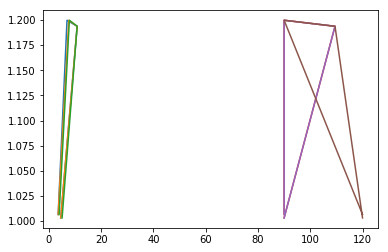

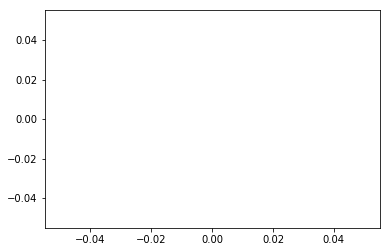

In [57]:
plt.plot(X3_train, Y_train)
plt.show()
plt.plot(X3_test, y_predicted)
plt.show()